# Problem Statement 
Predict whether a passenger on the Titanic survived or not.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load the Data

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.shape

(891, 12)

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data["Survived"].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [10]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:ylabel='Survived'>

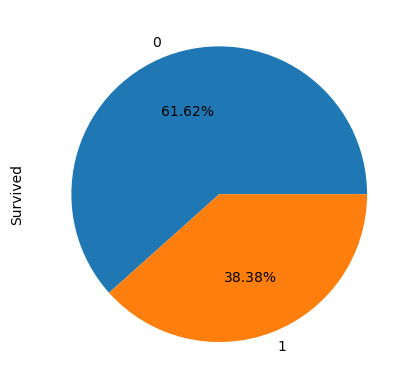

In [13]:
data["Survived"].value_counts().plot(kind = 'pie', autopct="%0.2f%%")

<AxesSubplot:ylabel='Pclass'>

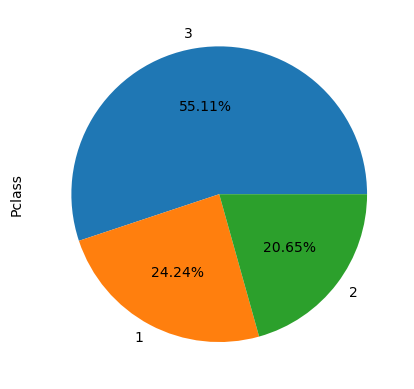

In [14]:
data["Pclass"].value_counts().plot(kind = 'pie', autopct="%0.2f%%")

<AxesSubplot:ylabel='Sex'>

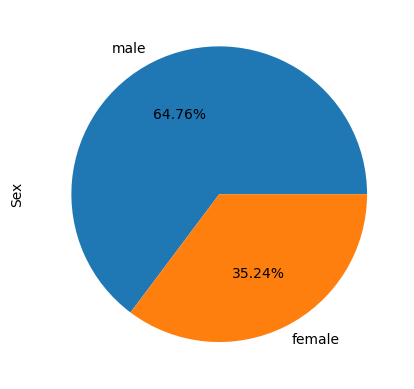

In [15]:
data["Sex"].value_counts().plot(kind = 'pie', autopct="%0.2f%%")

<AxesSubplot:ylabel='Embarked'>

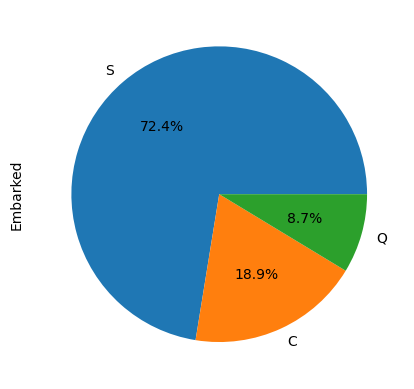

In [16]:
data["Embarked"].value_counts().plot(kind = 'pie', autopct="%0.1f%%")

<AxesSubplot:>

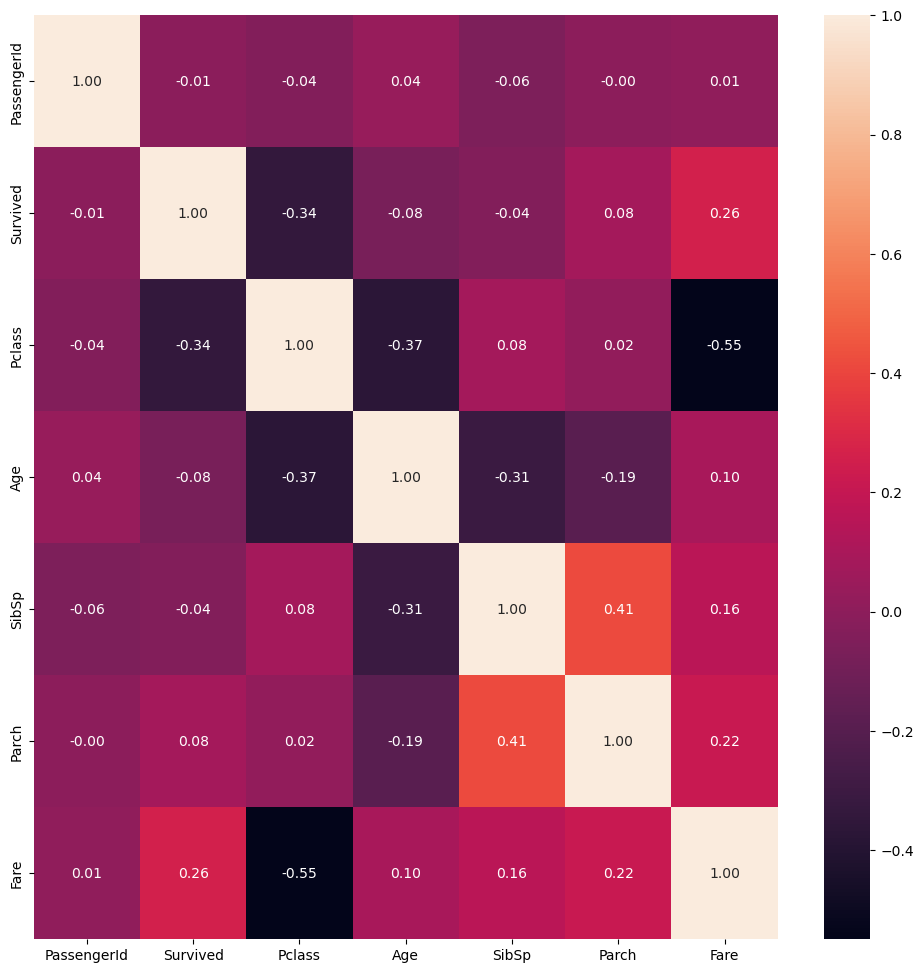

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot = True, fmt ="0.2f")

<AxesSubplot:ylabel='Age'>

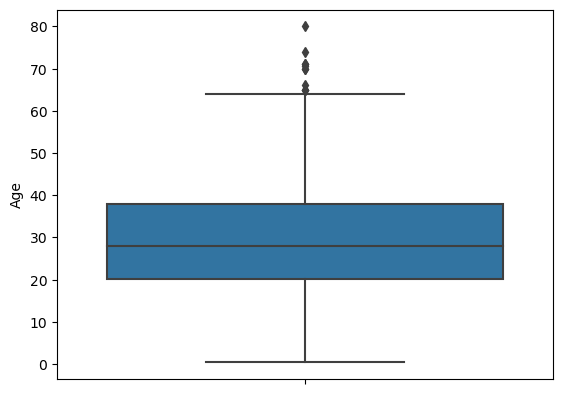

In [18]:
sns.boxplot(y = "Age", data = data)

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Passengers by Survived')

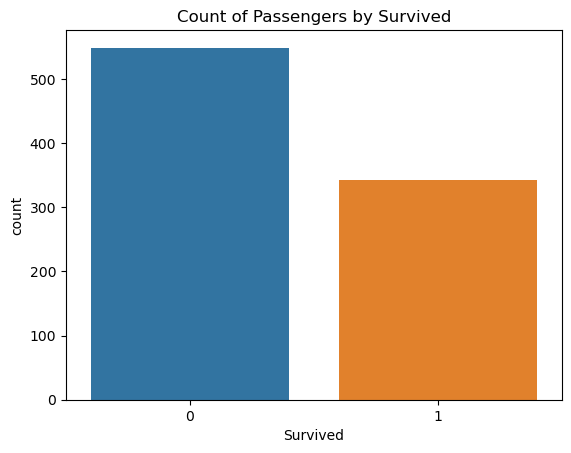

In [19]:
sns.countplot(data["Survived"])
plt.title("Count of Passengers by Survived")

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Passengers by Pclass')

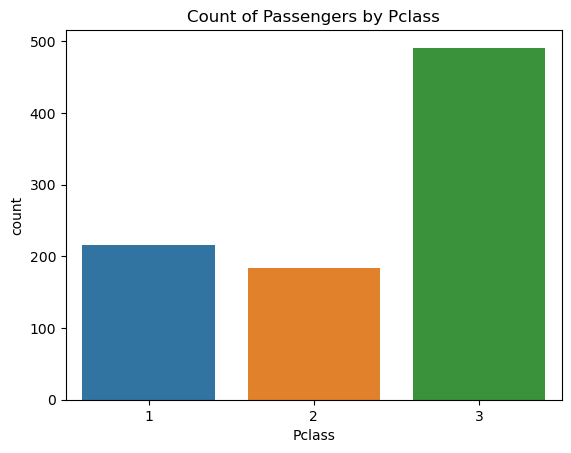

In [20]:
sns.countplot(data["Pclass"])
plt.title("Count of Passengers by Pclass")

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Passengers by Survived and Pclass')

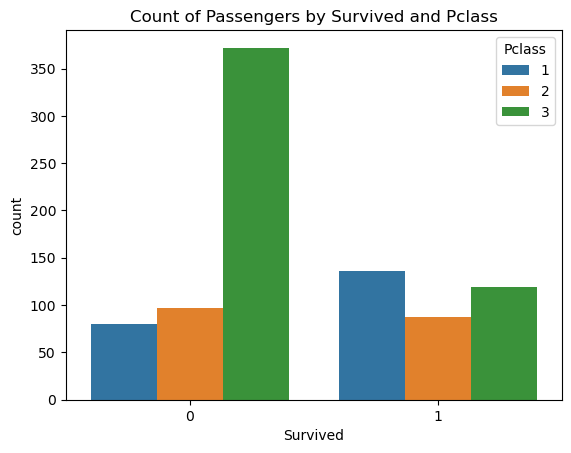

In [21]:
sns.countplot(data["Survived"], hue = data["Pclass"])
plt.title("Count of Passengers by Survived and Pclass")

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Passengers by Survived and Embarked')

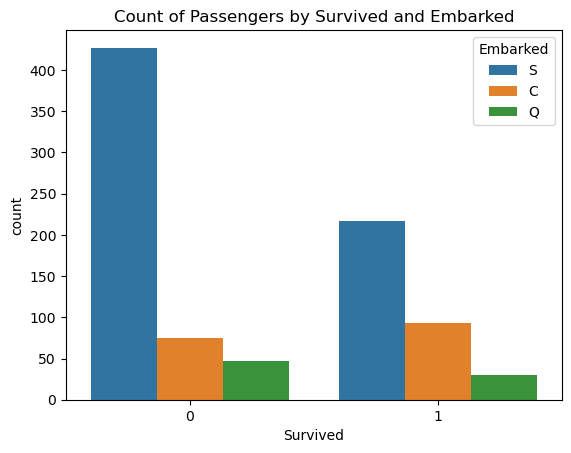

In [22]:
sns.countplot(data["Survived"], hue = data["Embarked"])
plt.title("Count of Passengers by Survived and Embarked")

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Passengers by Survived and Sex')

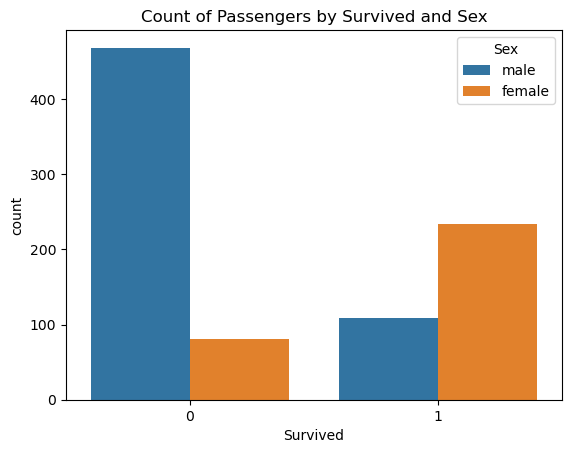

In [23]:
sns.countplot(data["Survived"], hue = data["Sex"])
plt.title("Count of Passengers by Survived and Sex")

Text(0, 0.5, 'Frequency')

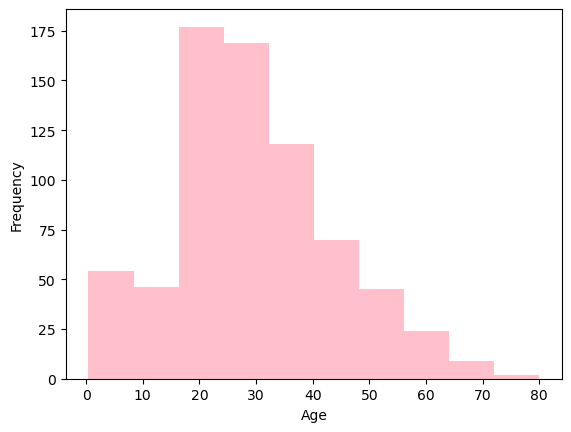

In [24]:
plt.hist(data["Age"], color = "pink")
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

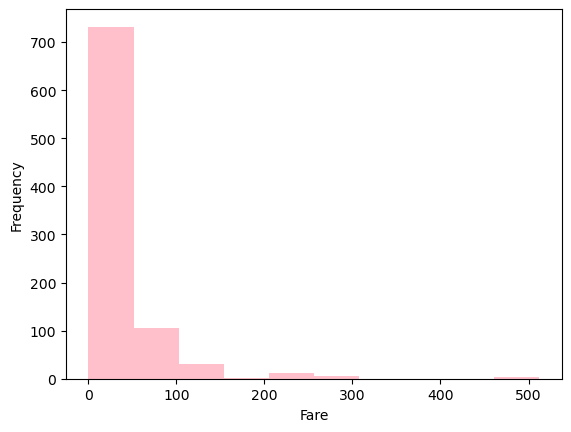

In [25]:
plt.hist(data["Fare"], color = "pink")
plt.xlabel("Fare")
plt.ylabel("Frequency")

# Removing Unneeded Columns 

In [26]:
data = data.drop(["PassengerId", "Name", "Ticket"], axis = 1)
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


# Data Preprocessing 

In [27]:
minmax = MinMaxScaler()
data['Fare'] = minmax.fit_transform(data[["Fare"]])

In [28]:
data["Age"] = data["Age"].fillna(data['Age'].median())
data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [29]:
data["Age"] = minmax.fit_transform(data[["Age"]])

In [30]:
# 0 - Do not have a Cabin 
# 1 - Have a Cabin 
data['Cabin'] = data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Passengers by Survived and Cabin')

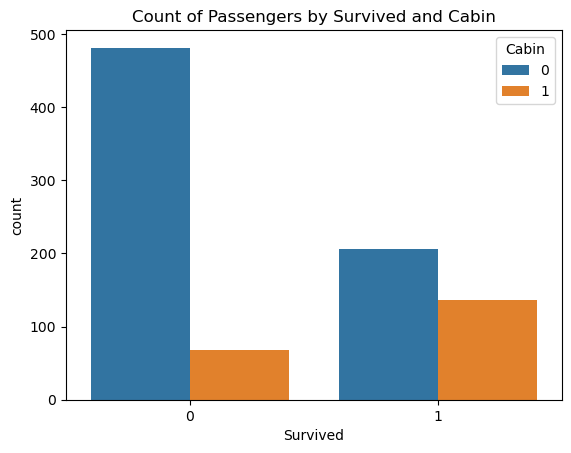

In [31]:
sns.countplot(data["Survived"], hue = data["Cabin"])
plt.title("Count of Passengers by Survived and Cabin")

In [32]:
dummies = pd.get_dummies(data[["Sex", "Embarked"]])
dummies

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [33]:
data = pd.concat([data, dummies], axis = 1)

In [34]:
data = data.drop(["Sex","Embarked"], axis = 1)

<AxesSubplot:>

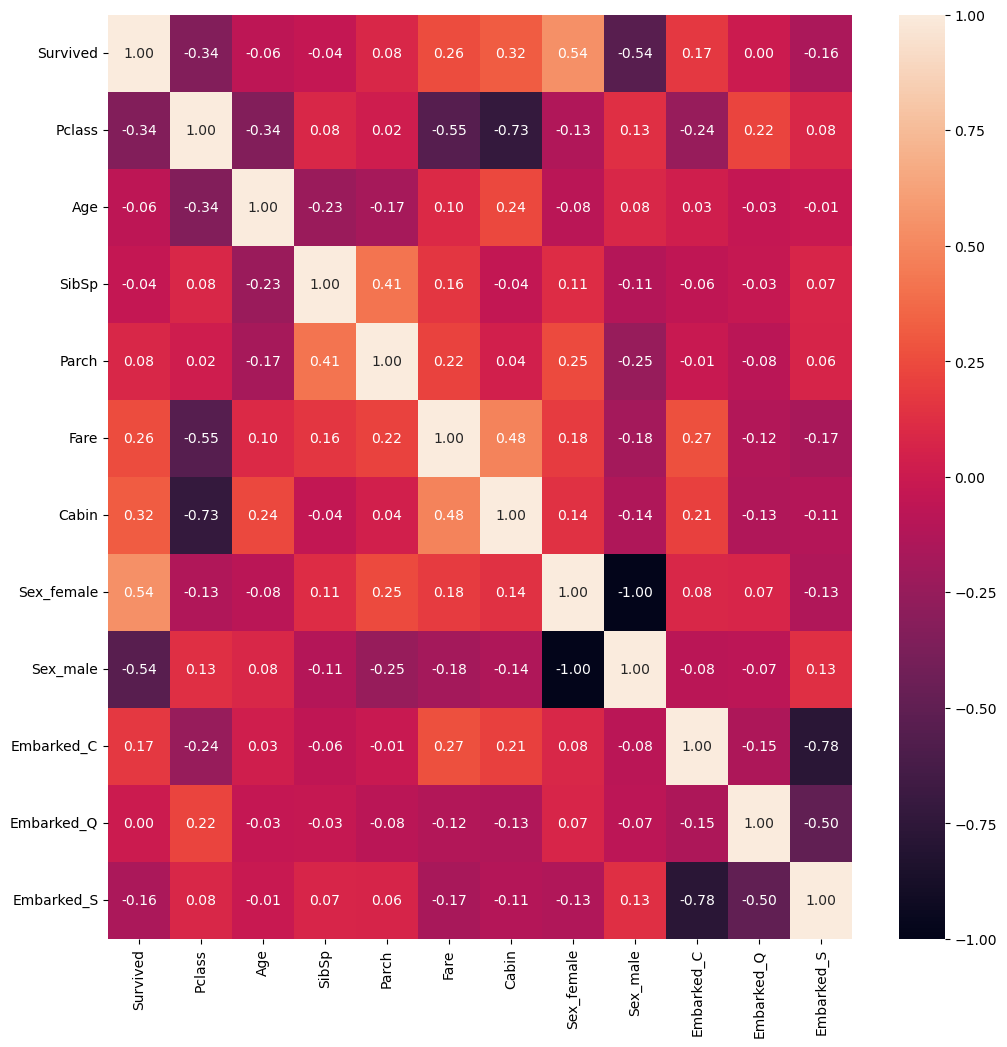

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot = True, fmt ="0.2f")

In [36]:
data.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

# Splitting Data: Training and Test Sets

In [37]:
X = data[["Pclass", "Sex_male", "Sex_female", "Age", "SibSp", "Parch", "Cabin", "Embarked_C","Embarked_S","Embarked_Q"]]
y = data['Survived']
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state  = 45) 

# Random Forest Classifer

Score of training set 0.9297752808988764
Score of testing set 0.8659217877094972
Classicication Report                precision    recall  f1-score   support

           0       0.91      0.88      0.90       117
           1       0.79      0.84      0.81        62

    accuracy                           0.87       179
   macro avg       0.85      0.86      0.85       179
weighted avg       0.87      0.87      0.87       179



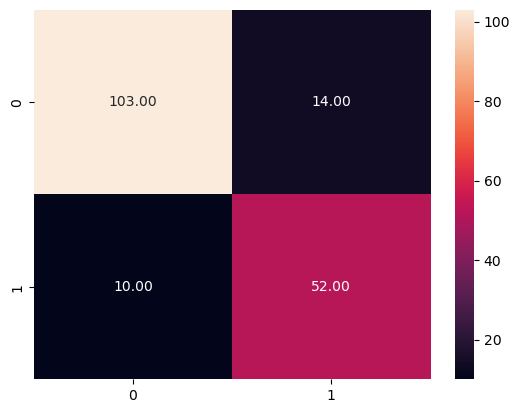

In [38]:
pipe1 = RandomForestClassifier(n_estimators = 10)
pipe1.fit(X_train, y_train)
print("Score of training set",pipe1.score(X_train, y_train))
print("Score of testing set", pipe1.score(X_test, y_test))
y_pred = pipe1.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt ="0.2f")

print("Classicication Report ",classification_report(y_test, pipe1.predict(X_test)))

# Decision Tree Classifier

Score of training set 0.9396067415730337
Score of testing set 0.8659217877094972
Classicication Report                precision    recall  f1-score   support

           0       0.90      0.89      0.90       117
           1       0.80      0.82      0.81        62

    accuracy                           0.87       179
   macro avg       0.85      0.86      0.85       179
weighted avg       0.87      0.87      0.87       179



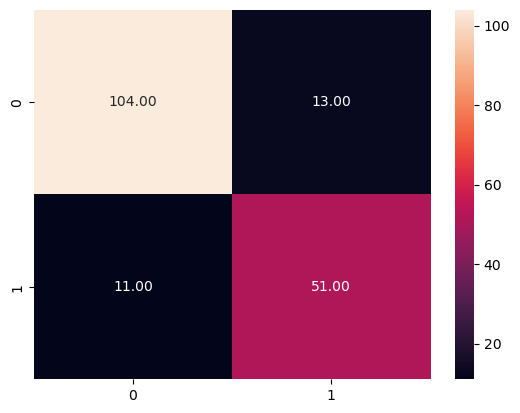

In [39]:
pipe = DecisionTreeClassifier()
pipe.fit(X_train, y_train)

print("Score of training set",pipe.score(X_train, y_train))
print("Score of testing set", pipe.score(X_test, y_test))
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt ="0.2f")

print("Classicication Report ",classification_report(y_test, pipe.predict(X_test)))

# Logistic Regression

Score of training set 0.8019662921348315
Score of testing set 0.8268156424581006
Classicication Report                precision    recall  f1-score   support

           0       0.88      0.85      0.86       117
           1       0.73      0.79      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.83      0.83       179



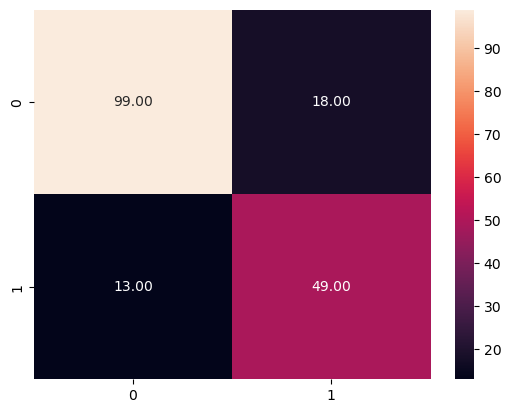

In [40]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score of training set",lr.score(X_train, y_train))
print("Score of testing set", lr.score(X_test, y_test))
y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt ="0.2f")

print("Classicication Report ",classification_report(y_test, lr.predict(X_test)))

# K Nearest Neighor

Score of training set 0.827247191011236
Score of testing set 0.8044692737430168
Classicication Report                precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179



C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

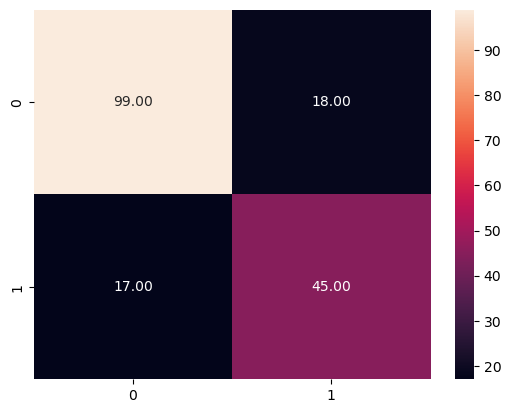

In [41]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Score of training set",knn.score(X_train, y_train))
print("Score of testing set", knn.score(X_test, y_test))
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt ="0.2f")

print("Classicication Report ",classification_report(y_test, knn.predict(X_test)))

# Gradient Boost Classifier

Accuracy: 0.88268156424581
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       117
           1       0.87      0.77      0.82        62

    accuracy                           0.88       179
   macro avg       0.88      0.86      0.87       179
weighted avg       0.88      0.88      0.88       179



<AxesSubplot:>

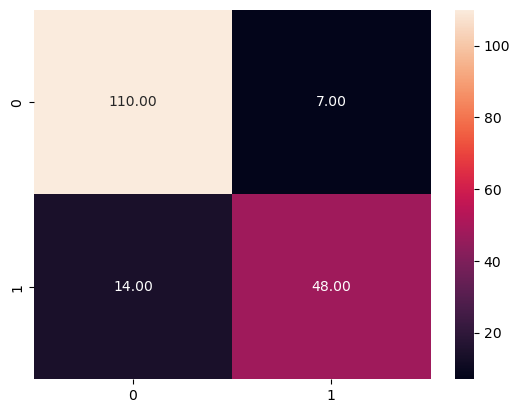

In [42]:
model = GradientBoostingClassifier()
param_grid = {'n_estimators': [100, 200,300], 'learning_rate': [0.001, 0.01,0.1], 'max_depth': [3, 5]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt ="0.2f")


# Stacked Classifier 

Accuracy: 0.8491620111731844
Classification Report               precision    recall  f1-score   support

           0       0.86      0.92      0.89       117
           1       0.83      0.71      0.77        62

    accuracy                           0.85       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



<AxesSubplot:>

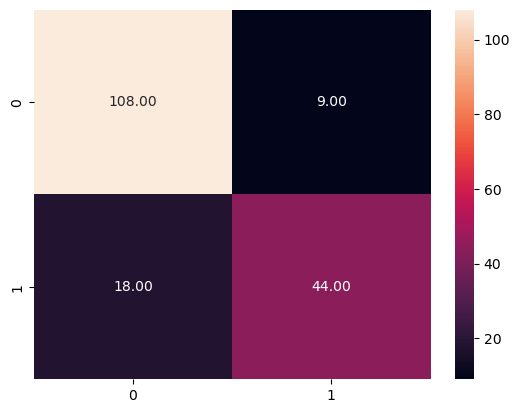

In [43]:
gbc = GradientBoostingClassifier(n_estimators= 300, learning_rate=0.01, max_depth=5)

estimators = [('gbc', gbc),("forest" , pipe1)]
stacking_clf = StackingClassifier(estimators=estimators,
                                  final_estimator= gbc)

stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print("Classification Report", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt ="0.2f")



# Comparing Multiple Machine Learning Models

C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


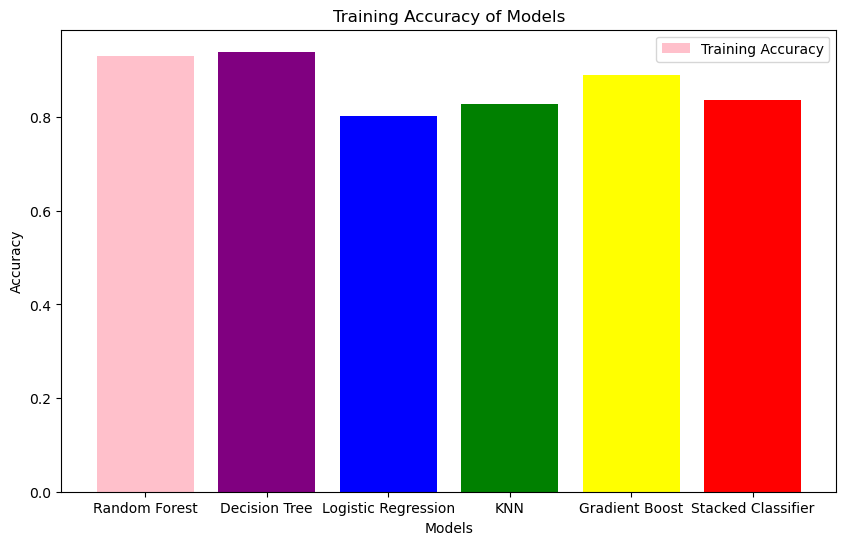

In [44]:
model_names = ["Random Forest","Decision Tree","Logistic Regression", "KNN", "Gradient Boost", "Stacked Classifier"]
train_accuracies = [pipe1.score(X_train, y_train), pipe.score(X_train, y_train),
                    lr.score(X_train, y_train),knn.score(X_train, y_train),best_model.score(X_train, y_train),
                   stacking_clf.score(X_train, y_train)]    
plt.figure(figsize=(10, 6))
plt.bar(model_names, train_accuracies, label='Training Accuracy', color = ["pink", "purple", "blue", "green", "yellow", "red"])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training Accuracy of Models')
plt.legend()
plt.show()

C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


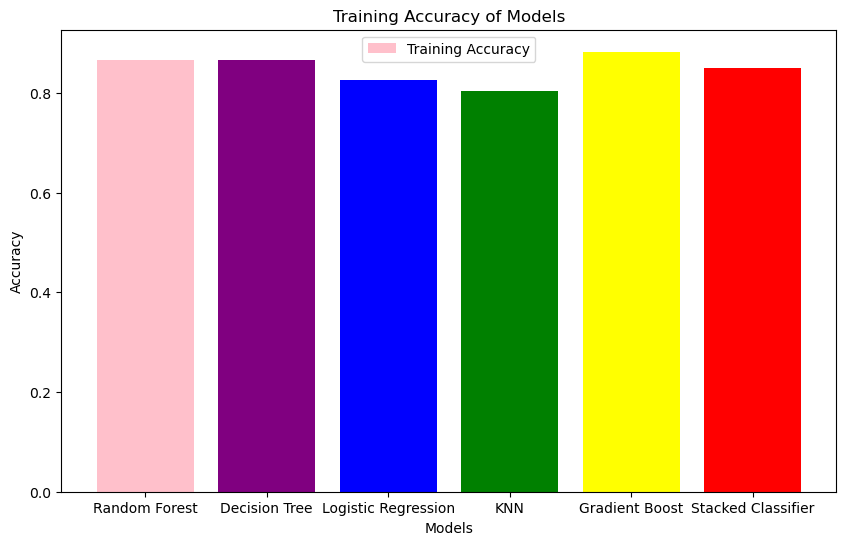

In [45]:
model_names = ["Random Forest","Decision Tree","Logistic Regression", "KNN", "Gradient Boost", "Stacked Classifier"]
train_accuracies = [pipe1.score(X_test, y_test), pipe.score(X_test, y_test),
                    lr.score(X_test, y_test),knn.score(X_test, y_test),best_model.score(X_test, y_test),
                   stacking_clf.score(X_test, y_test)]
colors = ["pink", "purple", "blue", "green", "yellow", "red"]
plt.figure(figsize=(10, 6))
plt.bar(model_names, train_accuracies, label='Training Accuracy', color = colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training Accuracy of Models')
plt.legend()
plt.show()

# Conclusion
Highest Accuracy is achieved by Gradient Boost Classifier -  88.26%